# TMDB Box Office Prediction

In this project , we will use the **TMDB Box Office Prediction** dataset which we obtained from **kaggle.com**.(link : https://www.kaggle.com/c/tmdb-box-office-prediction/overview)

The dataset has **23 columns** and **3000 rows**. 

We will do **Exploratory Data Analysis** to fetch out **important information** from the dataset.

We will also make some **new features** to **replace** the **existing ones**

Along with this, we will also use **WEB SCRAPING** to deal with the **NULL VALUES** of certain columns.

Our **objective** in this project is to make a **regression model** which will predict the **revenue** of the movies in this dataset.

We will be using the **Random Forest Regressor** as the **regression model**. We will also do **Randomized Search CV** and **Grid Search CV** to find the best set of **hyperparameters** for the **Random Forest** model.

For **evaluation**, we will use the **Root Mean Squared Logarithmic Error (RMSLE)**.

## Importing the Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import string
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [3]:
data = pd.read_csv("train.csv")

## Analysing the Data 1

In [4]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


We can see that **budget** and **runtime** have **ZERO** as **minimum value**. But we know that **budget** and **runtime** of movies can not be **ZERO**. So maybe the value **ZERO** is used in these two columns to potray **NULL VALUES**.

In [7]:
len(data[data['budget'] == 0])

812

**budget** column has 812 **NULL VALUES**. In the later section on dealing with **NULL VALUES**, we will be using  **WEB SCRAPING** to fill some of the **NULL VALUES** of the **budget** column. 

In [8]:
len(data[data['runtime'] == 0])

12

**runtime** column has 12 **NULL VALUES**.

In [9]:
## For the remaining columns, we will make a list of all columns having atleast 1 NULL VALUES. 

In [10]:
null_columns = [feature for feature in data.columns if data[feature].isnull().sum() > 0]
for col in null_columns:
    print(col + "------" + str(data[col].isnull().sum()))

belongs_to_collection------2396
genres------7
homepage------2054
overview------8
poster_path------1
production_companies------156
production_countries------55
runtime------2
spoken_languages------20
tagline------597
Keywords------276
cast------13
crew------16


We can see that there are a lot of columns with missing values. So either we will either **drop** these columns or **find a way to replace the missing values**.


For better visulization of **NULL VALUES**, we will make a **heatmap** using **seaborn** library.

<AxesSubplot:>

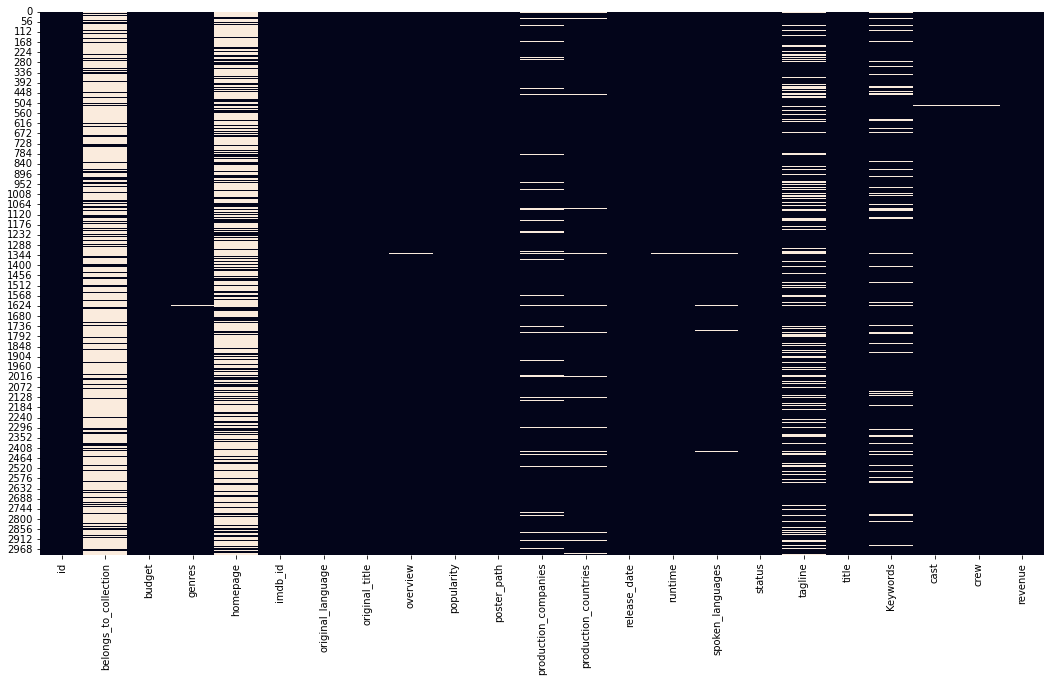

In [11]:
plt.figure(figsize = (18,10))
sns.heatmap(data.isnull() , cbar = False)

## Analysing the Data 2


Here, we will look at each column and try to find any relation with the **revenue** column and also ways to deal with its **NULL VALUES** if present.

### belongs_to_collection

In [12]:
data['belongs_to_collection']

0       [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1       [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
2995                                                  NaN
2996                                                  NaN
2997                                                  NaN
2998                                                  NaN
2999                                                  NaN
Name: belongs_to_collection, Length: 3000, dtype: object

In [13]:
print(data.loc[0]['belongs_to_collection'])
print(data.loc[1]['belongs_to_collection'])

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]


We can see that the values in this column are present in the form of a **dictionary**. The key **name** in each **dictionary** tells us about the collection to which the particular movie belongs to.

We can conclude from this section that **NULL VALUES** of this column tells us that the movie does not belong to any collection and **NON-NULL VALUES** shows that the movie belongs to a collection


To analyse the relation of this column with **revenue**, we can make a column called **collection** which will have a value **1** if the movie belongs to any collection and **0** if it does not belong to any collection. We will then make a bar plot to find any trend

Text(0, 0.5, 'revenue')

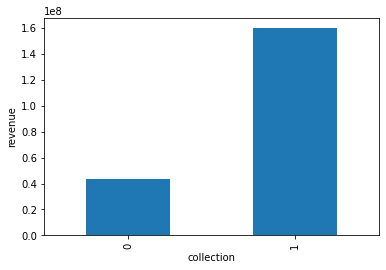

In [14]:
data['collection'] = np.where(data['belongs_to_collection'].isnull() , 0 , 1)
data.groupby(by = 'collection')['revenue'].mean().plot.bar()
plt.ylabel('revenue')

We can see that movies belonging to a collection have relatively higher **revenue**.

### budget

Text(0, 0.5, 'revenue')

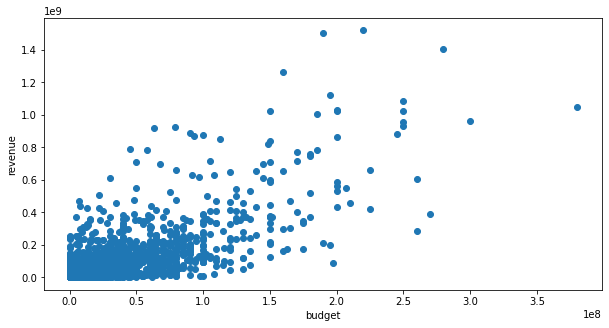

In [15]:
plt.figure(figsize = (10,5))
plt.scatter(data['budget'] , data['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')

We can see that with increase in **budget** , **revenue** is also increasing.

### genres

In [16]:
data['genres']

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

**genres** is also present as a dictionary. To get any information from this column, first we will need to parse this dictionary.

We will make a copy of our dataset to analyse. If our analysis provides us with useful trends, then we will implement the below code in our main dataset

In [17]:
data_1 = data.copy()
genre = set()
for i in data_1.index:
    if str(data_1.loc[i]['genres']) != 'nan':
        genres = ast.literal_eval(data_1.loc[i]['genres'])
        for j in range(len(genres)):
            data_1.at[i,genres[j]['name']] = 1
            genre.add(genres[j]['name'])    

In [18]:
genre_revenue = {}
for genre in genre:
    revenue = data_1[data_1[genre] == 1]['revenue'].mean()
    genre_revenue.update({genre:revenue})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Fantasy'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'Western'),
  Text(7, 0, 'TV Movie'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Horror'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Romance'),
  Text(13, 0, 'History'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Mystery'),
  Text(16, 0, 'Science Fiction'),
  Text(17, 0, 'Animation'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'Documentary')])

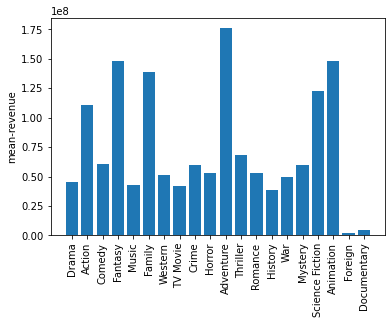

In [19]:
genre_list = list(genre_revenue.keys())
revenue = list(genre_revenue.values())
plt.bar(range(len(genre_revenue)),revenue, tick_label=genre_list)
plt.ylabel('mean-revenue')
plt.xticks(rotation = 90)

We can see that **Adventure** , **Fantasy** and **Animation** have the highest **mean revenue** and **Documentary** and **Foreign** genre have the least **mean revenue**.

So now we will include all the different genres in our dataset. It will be similar to as doing **One-Hot-Encoding**.

In [20]:
genre = set()
for i in data.index:
    if str(data.loc[i]['genres']) != 'nan':
        genres = ast.literal_eval(data.loc[i]['genres'])
        for j in range(len(genres)):
            data.at[i,genres[j]['name']] = 1
            genre.add(genres[j]['name'])   

In [21]:
genre = np.array(list(genre))

In [22]:
data[genre] = np.where(data[genre].isnull(), 0 , 1)

Now we have added all the genres in the dataset.

### homepage

In [23]:
data['homepage']

0                                     NaN
1                                     NaN
2       http://sonyclassics.com/whiplash/
3              http://kahaanithefilm.com/
4                                     NaN
                      ...                
2995                                  NaN
2996                                  NaN
2997                                  NaN
2998       http://www.alongcamepolly.com/
2999     http://www.abductionthefilm.com/
Name: homepage, Length: 3000, dtype: object

So this column contains links to the webpage of the particular movie. **NaN** values indicate that the particular movie does not have a website.

To extract any information from this column, using the website directly would be useless. So we will create another column called **is_homepage** which will have value **1** if the movie has a website and **0** if there is no website.

First we will do this to a copy of our dataset. If the extracted information is useful, then we will add this column to our original dataset.

In [24]:
data_1 = data.copy()
data_1['is_homepage'] = np.where(data_1['homepage'].isnull() , 0 , 1)

Text(0, 0.5, 'mean-price')

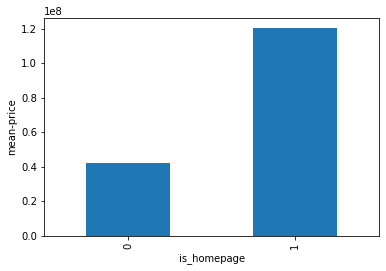

In [25]:
data_1.groupby(by = 'is_homepage')['revenue'].mean().plot.bar()
plt.ylabel('mean-price')

We can see that movies having a **homepage** has higher **revenue**.

So we will incorporate the **is_homepage** column in our original dataset.

In [26]:
data['is_homepage'] = np.where(data['homepage'].isnull() , 0 , 1)

### imdb_id

In [27]:
data['imdb_id']

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

This column just shows the **imdb_id** of each movie. For **prediction**, this column is useless, but while dealing with the **NULL VALUES** of **budget** column, we will use this column.

###  original_language

In [28]:
data['original_language']

0       en
1       en
2       en
3       hi
4       ko
        ..
2995    en
2996    sv
2997    en
2998    en
2999    en
Name: original_language, Length: 3000, dtype: object

This column represents the language of the movie.

Text(0, 0.5, 'mean-revenue')

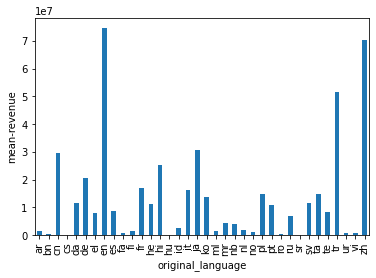

In [29]:
data.groupby(by = 'original_language')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

We can see that for **en**, the mean revenue is the highest followed by **zh**

In [30]:
len(data[data['original_language'] == 'en'])

2575

In [31]:
len(data[data['original_language'] == 'zh'])

19

2575 out of 3000 have **en** as their **original_language** and only **19** have **zh**.

We will make a column called **is_original_language_english** which will have value **1** is the **original_language** is **en** and **0** otherwise.

Text(0, 0.5, 'mean-revenue')

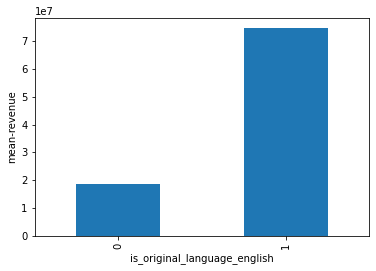

In [32]:
data_1 = data.copy()
data_1['is_original_language_english'] = np.where(data_1['original_language'] == 'en' , 1 ,0)
data_1.groupby(by = 'is_original_language_english')['revenue'].mean().plot.bar()
plt.ylabel('mean-revenue')

A clear distinction is seen in **revenue**.

So we will add **is_original_language_english** to our dataset

In [33]:
data['is_original_language_english'] = np.where(data['original_language'] == 'en' , 1 , 0)

### original_title

In [34]:
data['original_title']

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                           마린보이
                          ...                   
2995                                     Chasers
2996                                 Vi är bäst!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: original_title, Length: 3000, dtype: object

This column just gives us the **original title** of the movie. It is of no use to us.

### overview

In [35]:
data['overview']

0       When Lou, who has become the "father of the In...
1       Mia Thermopolis is now a college graduate and ...
2       Under the direction of a ruthless instructor, ...
3       Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4       Marine Boy is the story of a former national s...
                              ...                        
2995    Military men Rock Reilly and Eddie Devane are ...
2996    Three girls in 1980s Stockholm decide to form ...
2997    Samantha Caine, suburban homemaker, is the ide...
2998    Reuben Feffer is a guy who's spent his entire ...
2999    A young man sets out to uncover the truth abou...
Name: overview, Length: 3000, dtype: object

This column gives us the **overview** of the movie. It of no use to us.

### popularity

Text(0, 0.5, 'revenue')

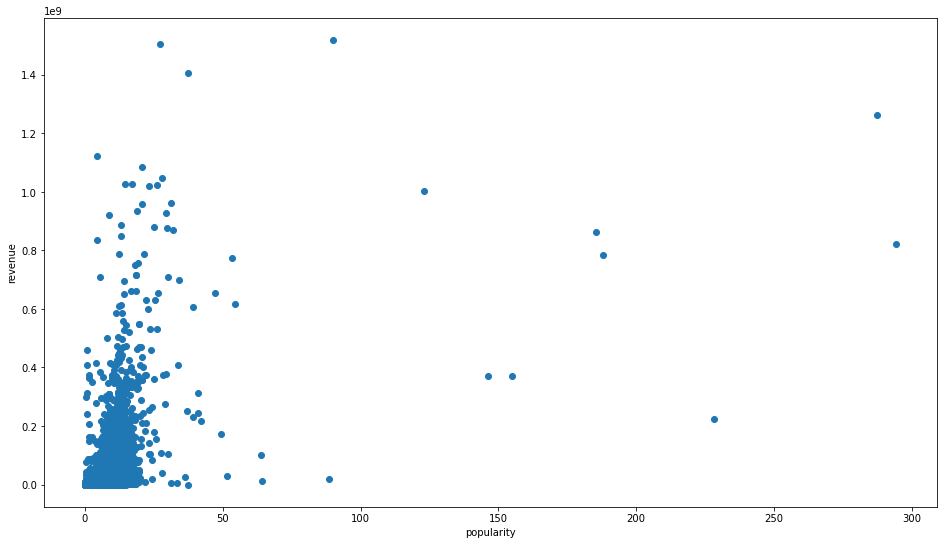

In [36]:
plt.figure(figsize = (16,9))
plt.scatter(x = data['popularity'] , y = data['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')

We can see that the majority of movie have popularity < 50 . Although, there are movies with high **popularity** and less **revenue** and movies with high **popularity** and high **revenue**.

### poster_path

In [37]:
data['poster_path']

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

This column gives us no valuable information.

### production_companies

In [38]:
data['production_companies']

0       [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1             [{'name': 'Walt Disney Pictures', 'id': 2}]
2       [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                     NaN
4                                                     NaN
                              ...                        
2995    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
2996    [{'name': 'Memfis Film', 'id': 321}, {'name': ...
2997    [{'name': 'New Line Cinema', 'id': 12}, {'name...
2998    [{'name': 'Jersey Films', 'id': 216}, {'name':...
2999    [{'name': 'Lions Gate Films', 'id': 35}, {'nam...
Name: production_companies, Length: 3000, dtype: object

This column is present in the form of a dictionary. So first we will have to parse it in order to get any information from this column.

Now instead of looking at the **mean-revenue** of each company, we will make a column called **number_of_production_companies** to extract any useful information.

In [39]:
number_of_production_companies = []
for i in data.index:
    if str(data.loc[i]['production_companies']) != 'nan':
        production_companies = ast.literal_eval(data.loc[i]['production_companies'])
        number_of_production_companies.append(len(production_companies))
    else:
        number_of_production_companies.append(0)

Text(0, 0.5, 'mean revenue')

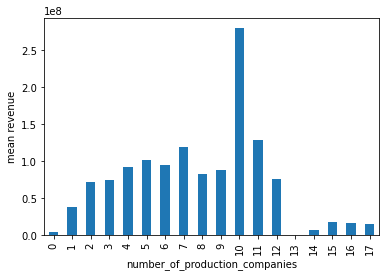

In [40]:
data_1 = data.copy()
data_1['number_of_production_companies'] = number_of_production_companies
data_1.groupby(by = 'number_of_production_companies')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see that initially, with increase in **number_of_production_companies** , the **mean-revenue** also **increases**, but then **decreases**.

We will add this column to our original dataset.

In [41]:
data['number_of_production_companies'] = number_of_production_companies

### production_countries

In [42]:
data['production_countries']

0       [{'iso_3166_1': 'US', 'name': 'United States o...
1       [{'iso_3166_1': 'US', 'name': 'United States o...
2       [{'iso_3166_1': 'US', 'name': 'United States o...
3                 [{'iso_3166_1': 'IN', 'name': 'India'}]
4           [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
                              ...                        
2995    [{'iso_3166_1': 'US', 'name': 'United States o...
2996    [{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...
2997    [{'iso_3166_1': 'US', 'name': 'United States o...
2998    [{'iso_3166_1': 'US', 'name': 'United States o...
2999    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, Length: 3000, dtype: object

In [43]:
production_country_2 = ast.literal_eval(data_1.loc[0]['production_countries'])

In [44]:
len(production_country_2)

1

This column have values in the form of dictionary. So first we will need to parse it.

We can see that most movie have *United States of America* as the **production_country**. 

So we will make two columns. 

One called **is_production_country_US** which will value **1** if one of the **production_country** is *United States of America* and **0** otherwise.

Second called **number_of_production_country**, which will store the number of **production_countries**. 

In [45]:
number_of_production_country = []
 
data_1 = data.copy()    
for i in data_1.index:
    if str(data_1.loc[i]['production_countries']) != 'nan':
        production_country = ast.literal_eval(data_1.loc[i]['production_countries'])
        number_of_production_country.append(len(production_country))
        a = -1
        for j in range(len(production_country)):
            if production_country[j]['iso_3166_1'] == 'US':
                data_1.at[i,'is_production_country_US'] = 1
                a = 0
        if a == -1:
            data_1.at[i,'is_production_country_US'] = 0
    else:
        number_of_production_country.append(0)
        data_1.at[i,'is_production_country_US'] = 0
            

Text(0, 0.5, 'mean revenue')

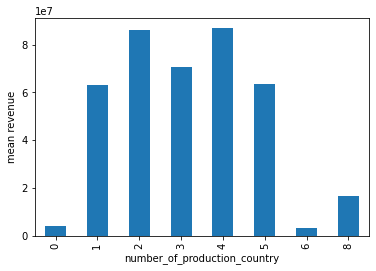

In [46]:
data_1['number_of_production_country'] = number_of_production_country
data_1.groupby(by = 'number_of_production_country')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see that for extreme values like **0**, **6** and **8**, the **mean revenue** is relatively low.

<AxesSubplot:xlabel='is_production_country_US'>

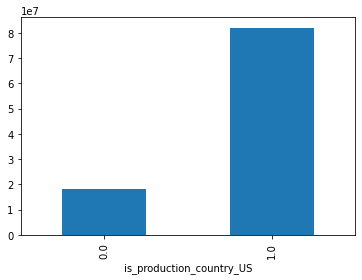

In [47]:
data_1.groupby(by = 'is_production_country_US')['revenue'].mean().plot.bar()

We can clearly see that country with **US** as one of the **production country** has relatively high **revenue**

We will add both **is_production_country_US** and **number_of_production_country** to our original dataset

In [48]:
data['number_of_production_country'] = number_of_production_country
data['is_production_country_US'] = data_1['is_production_country_US']

### release_date

In [49]:
data['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

First we will convert this column to a **datetime object**.

In [50]:
data['release_date'] = pd.to_datetime(data['release_date'])

Now, we will extract the **year**, **month** and **day** from the **release_date** column.

In [51]:
data_1 = data.copy()
data_1['year'] = data_1['release_date'].dt.year
data_1['month'] = data_1['release_date'].dt.month
data_1['day'] = data_1['release_date'].dt.day

Text(0, 0.5, 'mean revenue')

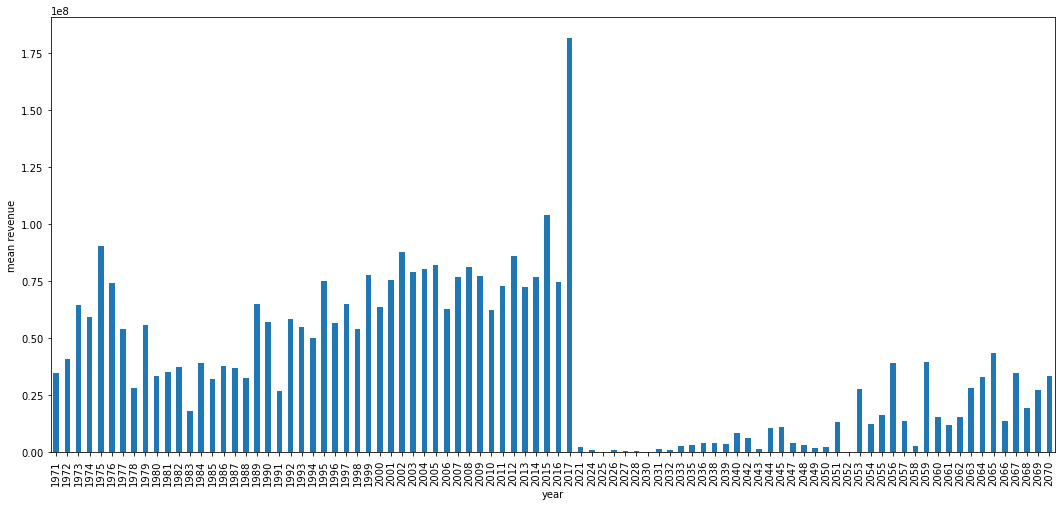

In [52]:
plt.figure(figsize = (18,8))
data_1.groupby(by = 'year')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see an error in the year column. There are values of year greater than 2021.

This could be because **2024** is actually **1924** and so on.

Hence we must sort this out first

In [53]:
for i in data_1.index:
    if data_1.loc[i]['year'] > 2021:
        date = str(data_1.loc[i]['year'])[:-2]
        date = '19' + date
        data_1.at[i,'year'] = date

We have fixed the anamoly in the **year** column.

Text(0, 0.5, 'mean revenue')

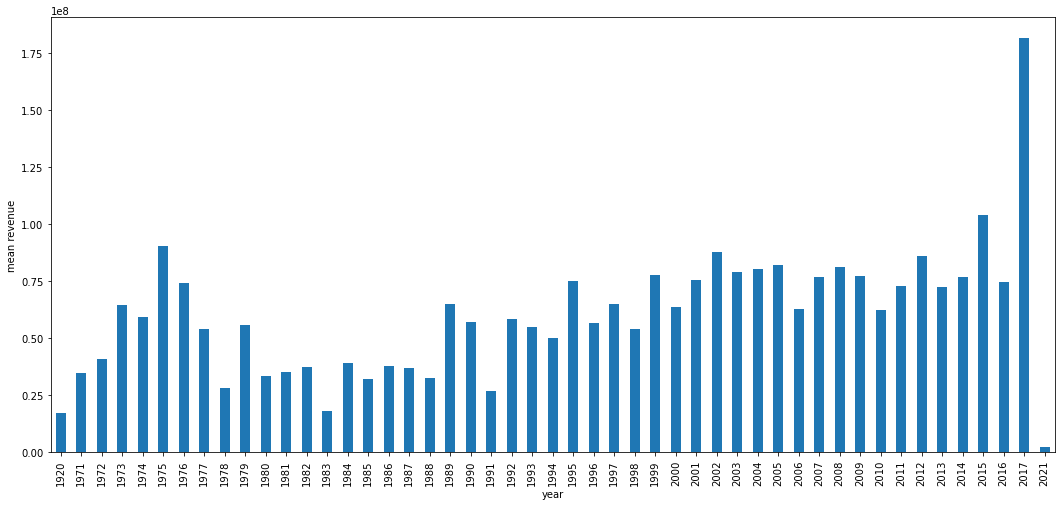

In [54]:
plt.figure(figsize = (18,8))
data_1.groupby(by = 'year')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see that with increase in **year**, the **mean revenue** is also increasing.

Text(0, 0.5, 'mean revenue')

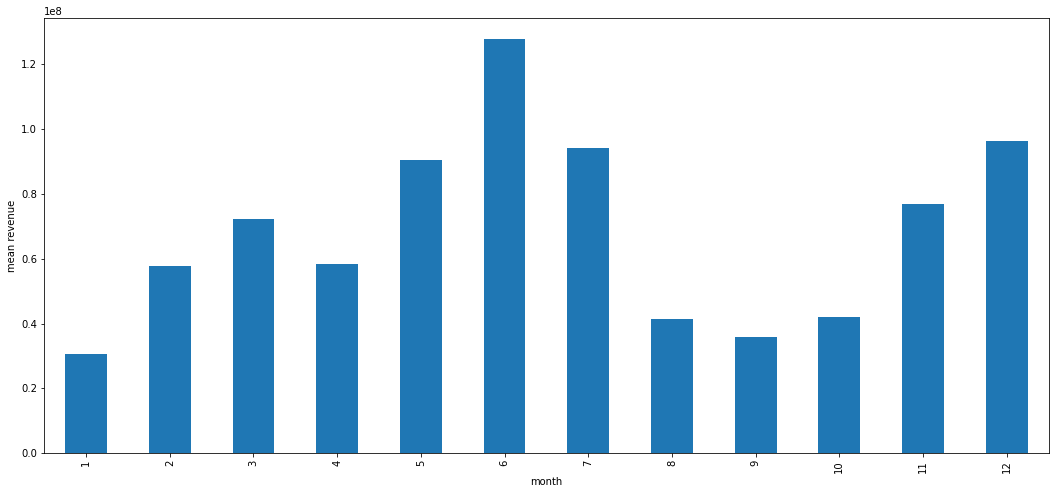

In [55]:
plt.figure(figsize = (18,8))
data_1.groupby(by = 'month')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see that **mean revenue** is varies for all the **months** 

Text(0, 0.5, 'mean revenue')

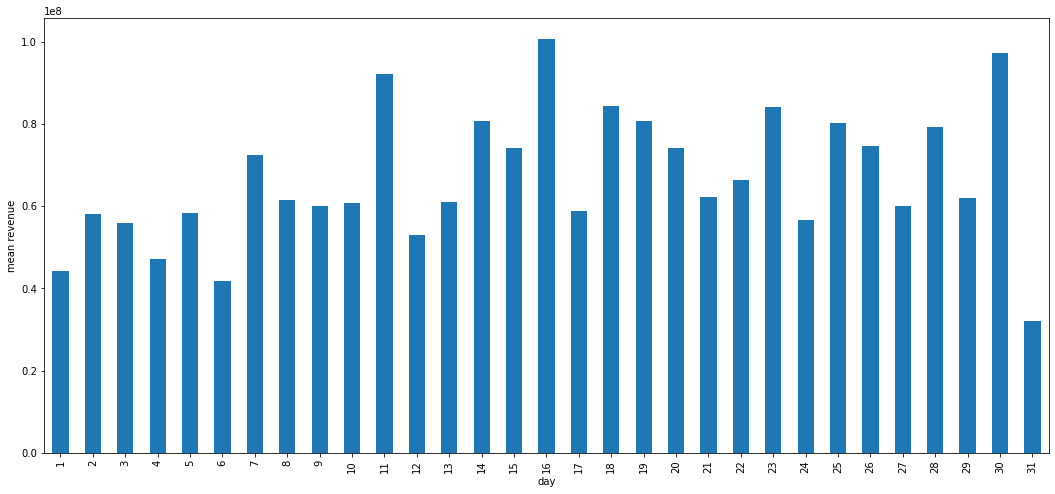

In [56]:
plt.figure(figsize = (18,8))
data_1.groupby(by = 'day')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

We can see that movies released at the **end of the month** have **higher** **revenue**.

We will now try to find out on which **day of the week** each movie was released to find any other valuable information.

In [57]:
data_1['day_of_the_week'] = data_1['release_date'].dt.dayofweek

<AxesSubplot:xlabel='day_of_the_week'>

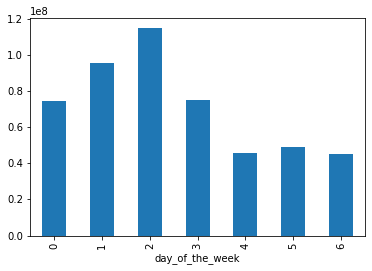

In [58]:
data_1.groupby(by = 'day_of_the_week')['revenue'].mean().plot.bar()

Here the week starts from **monday**, hence **0** denotes **monday**. We can see that **mean revenue** is highest for **tuesday** and **wednesday**.

We will include all the 4 new columns that we created in our original dataset.

In [59]:
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data['day'] = data['release_date'].dt.day

for i in data.index:
    if data.loc[i]['year'] > 2021:
        date = str(data.loc[i]['year'])[:-2]
        date = '19' + date
        data.at[i,'year'] = date

data['day_of_the_week'] = data['release_date'].dt.dayofweek        

### runtime

In [60]:
data['runtime']

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

This column gives us the **lenght** of each movie in **minutes**.

In [61]:
len(data['runtime'].unique())

140

We can see that there are **140** different movie **runtime**.


We will now create three groups. 

1) movies with runtime less than 1 hour.

2) movies with runtime between 1 and 2 hours.

3) movies with runtime > 2 hours

In [62]:
data_1 = data.copy()
for i in data_1.index:
    if data_1.loc[i]['runtime'] < 60:
        data_1.at[i,'runtime_group'] = 1
    elif (data_1.loc[i]['runtime'] > 60) & (data_1.loc[i]['runtime'] < 120):
        data_1.at[i,'runtime_group'] = 2
    else:
        data_1.at[i,'runtime_group'] = 3

<AxesSubplot:xlabel='runtime_group'>

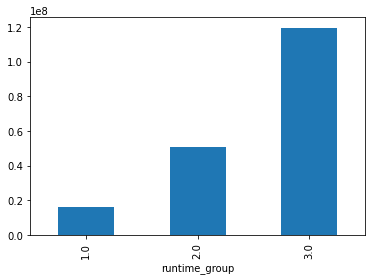

In [63]:
data_1.groupby(by = 'runtime_group')['revenue'].mean().plot.bar()

We can see that movies in the **3rd group** has the highest **mean revenue**.

We will include this column in our original dataset

In [64]:
data['runtime_group'] = data_1['runtime_group']

### spoken_languages

In [65]:
data['spoken_languages']

0                [{'iso_639_1': 'en', 'name': 'English'}]
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
                              ...                        
2995             [{'iso_639_1': 'en', 'name': 'English'}]
2996             [{'iso_639_1': 'sv', 'name': 'svenska'}]
2997             [{'iso_639_1': 'en', 'name': 'English'}]
2998             [{'iso_639_1': 'en', 'name': 'English'}]
2999             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 3000, dtype: object

This column consists of all the different **languages** spoken in the movie and its in the form of a dictionary, so first we will have to parse it.

In [66]:
data_1 = data.copy()
spoken_languages = set()
number_of_spoken_languages = []
for i in data_1.index:
    if str(data_1.loc[i]['spoken_languages']) != 'nan':
        languages = ast.literal_eval(data_1.loc[i]['spoken_languages'])
        number_of_spoken_languages.append(len(languages))
        for j in range(len(languages)):
            data_1.at[i,languages[j]['name']] = 1
            spoken_languages.add(languages[j]['name'])
    else:
        number_of_spoken_languages.append(0)

In [67]:
languages_revenue = {}

for languages in spoken_languages:
    if languages != '':
        revenue = data_1[data_1[languages] == 1]['revenue'].mean()
        languages_revenue.update({languages:revenue})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'български език'),
  Text(1, 0, 'Hrvatski'),
  Text(2, 0, 'العربية'),
  Text(3, 0, 'Català'),
  Text(4, 0, 'ελληνικά'),
  Text(5, 0, 'қазақ'),
  Text(6, 0, '한국어/조선말'),
  Text(7, 0, 'ภาษาไทย'),
  Text(8, 0, 'Norsk'),
  Text(9, 0, 'Tiếng Việt'),
  Text(10, 0, 'Nederlands'),
  Text(11, 0, 'Srpski'),
  Text(12, 0, 'ਪੰਜਾਬੀ'),
  Text(13, 0, 'Română'),
  Text(14, 0, 'தமிழ்'),
  Text(15, 0, 'বাংলা'),
  Text(16, 0, 'shqip'),
  Text(17, 0, 'Bahasa indonesia'),
  Text(18, 0, 'Esperanto'),
  Text(19, 0, 'اردو'),
  Text(20, 0, 'Polski'),
  Text(21, 0, 'English'),
  Text(22, 0, 'Wolof'),
  Text(23, 0, 'Español'),
  Text(24, 0, 'Português'),
  Text(25, 0, 'Eesti'),
  Text(26, 0, 'Latin'),
  Text(27, 0, '普通话'),
  Text(28, 0, 'euskera'),
  

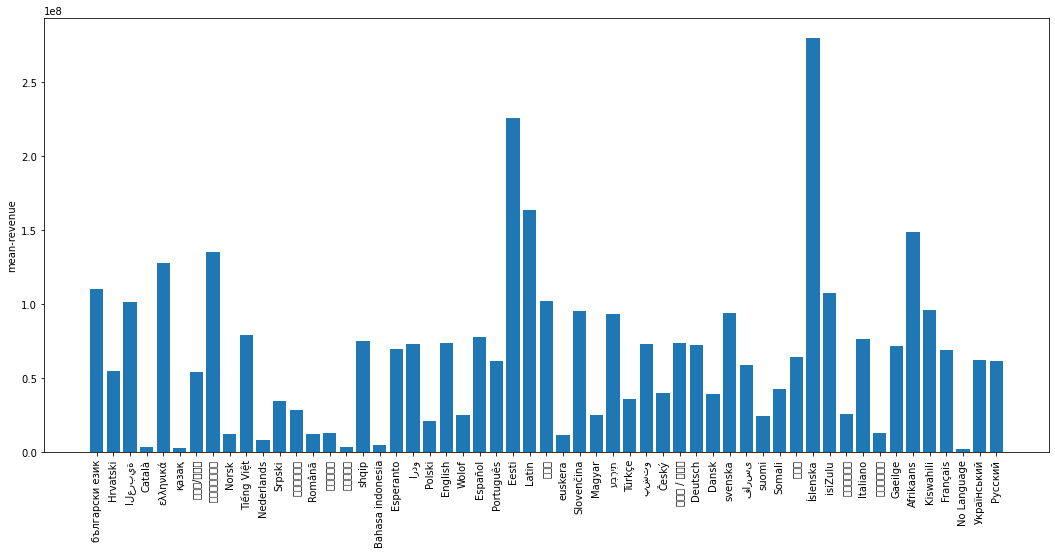

In [68]:
language_list = list(languages_revenue.keys())
revenue = list(languages_revenue.values())
plt.figure(figsize = (18,8))
plt.bar(range(len(languages_revenue)),revenue, tick_label=language_list)
plt.ylabel('mean-revenue')
plt.xticks(rotation = 90)

we can see that **mean revenue** varies upon the **langauge** spoken in the movie.

Text(0, 0.5, 'mean revenue')

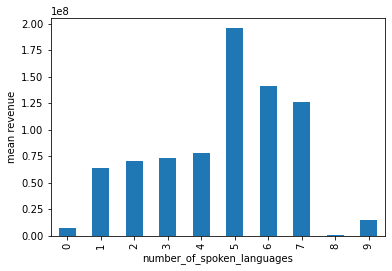

In [69]:
data_1['number_of_spoken_languages'] = number_of_spoken_languages
data_1.groupby(by = 'number_of_spoken_languages')['revenue'].mean().plot.bar()
plt.ylabel('mean revenue')

**mean revenue** varies depending upon the **number of spoken languages**. 

So we will include all the **types of languages spoken** in our original dataset and also the **number_of_spoken_languages** column

In [70]:
for i in data.index:
    if str(data.loc[i]['spoken_languages']) != 'nan':
        languages = ast.literal_eval(data.loc[i]['spoken_languages'])
        for j in range(len(languages)):
            data.at[i,languages[j]['name']] = 1
spoken_languages = np.array(list(spoken_languages))
data[spoken_languages] = np.where(data[spoken_languages].isnull() , 0 , 1)
data['numer_of_spoken_languages'] = number_of_spoken_languages

### status

In [71]:
data['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [72]:
data['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

There are two types of **status**.

1) Released (2996 values)

2) Rumored ( 4 values)



we will plot a bar graph to see if this column yields any valuable information

<AxesSubplot:xlabel='status'>

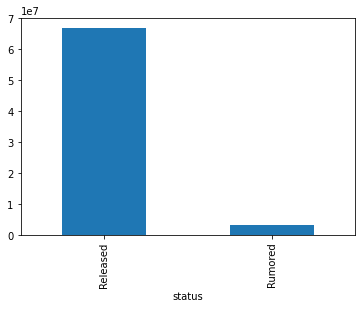

In [73]:
data.groupby(by = 'status')['revenue'].mean().plot.bar()

We can see that **Released** has higher **mean revenue** than **Rumored**

Using this column, we will make two columns called **Rumoured** and **Released** which will be similar to as doing One-Hot-Encoding on the **status** column.

In [74]:
data['Released'] = np.where(data['status'] == 'Released' , 1 , 0)
data['Rumoured'] = np.where(data['status'] == 'Rumoured' , 1 , 0)

### tagline

In [75]:
data['tagline']

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

This column gives us the tagline for each movie. This column is useless for us

### title

In [76]:
data['title']

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

This column gives us the **title** each movie in **english**. We have no use of this column.

### Keywords

In [77]:
data['Keywords']

0       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                     NaN
                              ...                        
2995    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2996    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2997    [{'id': 441, 'name': 'assassination'}, {'id': ...
2998    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
2999    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 3000, dtype: object

This columns gives us different **keyword** which are related to the movies. It is of no use to us.

### cast

In [78]:
data['cast']

0       [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1       [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2       [{'cast_id': 5, 'character': 'Andrew Neimann',...
3       [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4       [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
                              ...                        
2995    [{'cast_id': 2, 'character': 'Rock Reilly', 'c...
2996    [{'cast_id': 5, 'character': 'Bobo', 'credit_i...
2997    [{'cast_id': 10, 'character': 'Samantha Caine ...
2998    [{'cast_id': 8, 'character': 'Reuben Feffer', ...
2999    [{'cast_id': 2, 'character': 'Nathan Harper', ...
Name: cast, Length: 3000, dtype: object

In [79]:
data.loc[0]['cast']

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

This column gives us the **character name** and **who played it**. We will not use this column.

### crew

In [80]:
data['crew']

0       [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1       [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2       [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3       [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4       [{'credit_id': '52fe464b9251416c75073b43', 'de...
                              ...                        
2995    [{'credit_id': '52fe4494c3a368484e02ac7d', 'de...
2996    [{'credit_id': '5716b72ac3a3686678012c84', 'de...
2997    [{'credit_id': '52fe443a9251416c7502d579', 'de...
2998    [{'credit_id': '556f817b9251410866000a63', 'de...
2999    [{'credit_id': '5391990d0e0a260fb5001629', 'de...
Name: crew, Length: 3000, dtype: object

In [81]:
data.loc[0]['crew']

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

This columns gives us all the details on the **crew** of the movies. We will not use this column.

## Data Preprocessing

In this section, we will deal with the **missing values** of columns which we require in our **model** and we will also **remove** all the **unwanted columns**.

Columns to remove : **crew, cast , keywords, title, tagline, status, spoken_languages, runtime, release_date, production_countries, production_companies, poster_path, overview, original_title, original_language, imdb_id, homepage, genres, belongs_to_collection**. 

### Dealing With Null Values

### budget

First we will deal with the **NULL VALUES** of **budget** column. For this, we will be using **Web Scraping**. We will scrape the **budget** from **wikipedia** and **imdb**.

We will first try to find out the **budget** of movies using **wikipedia**. For this we will use the **imdb_id** column.

First we will use the **imdb_id** to get to the movie's **imdb webpage**. Then using **Beautiful soup** library, we will extract the **title** of the **html** page. Then we will use it to get to the **wikipedia** page of the movie after which we will again use **Beautiful Soup** library to extract the budget.

In [90]:
for i in data.index:
      if data.loc[i]['budget'] == 0:
        id = data.loc[i]['imdb_id']
        url_1 = f"https://www.imdb.com/title/{id}/"
        html_1 = requests.get(url_1)
        soup_1 = BeautifulSoup(html_1.content , 'html.parser')
        title = soup_1.find_all('title')
        title = title[0].get_text()
        title = title[:-7]
        split = title.split(" ")
        word = ""
        for j in range(len(split)):
            if(split[j][0] == '('):
                word = word + split[j][:-1] + "_" + "film" +")"
            else:    
                word = word + split[j] + "_"
        title = word
        url_2 = f"https://en.wikipedia.org/wiki/{title}"        
        html_2 = requests.get(url_2)
        soup_2 = BeautifulSoup(html_2.content , 'html.parser')
        table = soup_2.find_all("table")
        try:
            row = table[0].findAll('tr')
            if(len(row) < 2):
                  row = table[1].findAll('tr')
            budget = row[-2].get_text()
            if(budget[:6] != "Budget"): 
                continue
            else:
                end = 0
                for j in range(7,len(budget)):
                    if j < len(budget)-1 and budget[j+1] == '[':
                        end = j
                        break;
                    if j == len(budget)-1:
                        end = j
                budget = budget[7:end+1]
                split = budget.split(" ")

                if(len(split) > 1 and split[1] == 'million'):
                    budget = split[0]
                    budget = budget + "000000"
                    budget = int(budget)
                    data.at[i,'budget'] = budget 
                else:
                    budget = budget.translate(str.maketrans('', '', string.punctuation))
                    budget = int(budget)
                    data.at[i,'budget'] = budget 
        except:
            continue

Now for some movies, the **url** of the **wikipedia** page of a movie does not have the title similar to the one we found in the **imdb webpage**. 

Instead, a pattern can be observed in the **url** of the **wikipedia** pages for some movies.

**Movies** which **belong to a collection** do not have **{film}** at the end of the **title** of the movie in the **url** of its **wikipedia** page whereas **movies** which do not **belong to a collection** do have **{film}** at the end of the **title** of the movie in the **url** of its **wikipedia** page.

We will use this to extract **Budget** of the left out movies.

For **title** , we will use the **title** column of the dataset.

In [91]:
for i in data.index:
      if(data.loc[i]['budget'] == 0):
            name = data.loc[i]['title']
            name = name.split(" ")
            name_html = ""
            if str(data.loc[i]['belongs_to_collection']) == 'nan' :
                for j in range(len(name)):
                    name_html = name_html + name[j] + "_"
                url = f"https://en.wikipedia.org/wiki/{name_html}(film)"
                html = requests.get(url)
                soup = BeautifulSoup(html.content , 'html.parser')
                table = soup.find_all('table')
                try:
                    row = table[0].findAll('tr')
                    if(len(row) < 2):
                          row = table[1].findAll('tr')
                    budget = row[-2].get_text()
                    if(budget[:6] != "Budget"): 
                          continue
                    else:
                        end = 0
                        for j in range(7,len(budget)):
                            if j < len(budget)-1 and budget[j+1] == '[':
                                end = j
                                break;
                            if j == len(budget)-1:
                                end = j
                        budget = budget[7:end+1]
                        split = budget.split(" ")
                        if(len(split) > 1 and split[1] == 'million'):
                            budget = split[0]
                            budget = budget + "000000"
                            budget = int(budget)
                            data.at[i,'budget'] = budget
                        else:
                            budget = budget.translate(str.maketrans('', '', string.punctuation))
                            budget = int(budget)
                            data.at[i,'budget'] = budget
                except:
                    continue

            else:
                for j in range(len(name)):
                    name_html = name_html + name[j] + "_"
                name_html = name_html[:-1] 
                url = f"https://en.wikipedia.org/wiki/{name_html}"
                html = requests.get(url)
                soup = BeautifulSoup(html.content , 'html.parser')
                table = soup.find_all('table')
                try:
                    row = table[0].findAll('tr')
                    if(len(row) < 2):
                        row = table[1].findAll('tr')
                    budget = row[-2].get_text()
                    if(budget[:6] != "Budget"):
                        continue
                    else:
                        end = 0
                        for h in range(7,len(budget)):
                            if h < len(budget)-1 and budget[h+1] == '[':
                                end = h
                                break;
                            if h == len(budget)-1:
                                end = h
                        budget = budget[7:end+1]

                        split = budget.split(" ")        
                        if(len(split) > 1 and split[1] == 'million'):
                            budget = split[0]
                            budget = budget + "000000"
                            budget = int(budget)
                            data.at[i,'budget'] = budget
                        else:
                            budget = budget.translate(str.maketrans('', '', string.punctuation))
                            budget = int(budget)
                            data.at[i,'budget'] = budget
                except:
                      continue

For the remaining **movies** we will use the **imdb** website to get the **budget**. For this we will use the **imdb_id** column to get the **url** for each movie. Then using **Beautiful Soup** , we will find the **budget**.

In [92]:
for i in data.index:
    if data.loc[i]['budget'] == 0:
        id = data.loc[i]['imdb_id']
        url = f"https://www.imdb.com/title/{id}/"
        html = requests.get(url)
        soup = BeautifulSoup(html.content , 'html.parser')
        div = soup.find_all('div')
        try:
            span = div[1].findAll('span')
            index = 0
            for j in range(len(span)):
                if span[j].get_text().find('Budget')!= -1:
                    index = j
                    break;
            if index == 0:
                continue
            else:
                budget = span[index+1].get_text()[1:-12]
                budget = budget.translate(str.maketrans('', '', string.punctuation))
                budget = int(budget)
                data.at[i,'budget'] = budget
        except:
            continue

In [93]:
len(data[data['budget']==0])

542

We can see that out of **812** **NULL VALUES** in the **budget** column, we found the **budget** of **270** movies. 

For the remaining movies, we will replace the null values with the **mean** value of the **budget** column.

In [94]:
data['budget'].fillna(data['budget'].mean(), inplace = True)

### runtime

**NULL VALUES** in **runtime** column were represented by **0**. We have already accomodated these rows in the **1st group** of the newly made **runtime_group** column. So we have already dealt with the **NULL VALUES** of this column.

For the remaining columns with **NULL VALUES**, we have already extracted important information from them and have made separate column for them. Hence we will not deal with their **NULL VALUES** and will remove these columns from our dataset.

### Removing unwanted columns.

In [97]:
unwanted_columns = ['id','crew', 'cast' , 'Keywords', 'title', 'tagline', 'status', 'spoken_languages', 'runtime', 'release_date', 'production_countries', 'production_companies', 'poster_path', 'overview', 'original_title', 'original_language', 'imdb_id', 'homepage', 'genres', 'belongs_to_collection']
data.drop(unwanted_columns , axis = 1 , inplace = True)

Now we will move on to create a regression model to train on our dataset.

Before that , first we must separate the dataset into **training** and **test** dataset.

## Splitting the dataset into training and test set.

In [151]:
train , test = train_test_split(data , test_size = 0.2)

## Splitting the training and test set into features and label.

In [152]:
# This is the training feature dataset.
X_train = train.drop('revenue' , axis = 1)
# This is the training label set.
Y_train = train['revenue']
# This is the test feature dataset.
X_test = test.drop('revenue' , axis = 1)
# This is the test label set.
Y_test = test['revenue']

## Scaling the feature dataset.

In this section, we will **scale** our feature datasets (training and test) using the **StandardScaler** provided by the **sklearn** library.

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# We have to use the same scaler to transform the test set as this will use the same parameter calculated for the training set
# to tranform the test set.
X_test = scaler.transform(X_test)

## Training the model.

We will be using The **Random Forest Regressor** for this project. We will first use the **default Hyperparameters** and then later we will **tune** the **hyperparameters**.

In [154]:
regressor = RandomForestRegressor(n_jobs = -1)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

## Using the trained model on our test set.

In [155]:
Y_pred = regressor.predict(X_test)

## Evaluating the results.

Here we will use the **Root-Mean-Squared-Logarithmic-Error(RMSLE)** to **evaluate the performance** of our model.

We will use the **mean_squared_log_error** metric provided by **sklearn** and then take the **square root** of this value to get the 
**Root-Mean-Squared-Logarithmic-Error**

In [156]:
msle = mean_squared_log_error(Y_test , Y_pred)
rmse = np.sqrt(msle)

print("The Root-Mean-Squared-Logarithmic-Error of the untuned model is : " + str(rmse))

The Root-Mean-Squared-Logarithmic-Error of the untuned model is : 2.755745690257132


The **RMSLE** value for the untuned model is **2.755745690257132**.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 [Text(0, 0, 'budget'),
  Text(1, 0, 'popularity'),
  Text(2, 0, 'collection'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Thriller'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Animation'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Documentary'),
  Text(13, 0, 'Music'),
  Text(14, 0, 'Crime'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Foreign'),
  Text(18, 0, 'Fantasy'),
  Text(19, 0, 'War'),
  Text(20, 0, 'Western'),
  Text(21, 0, 'History'),
  Text(22, 0

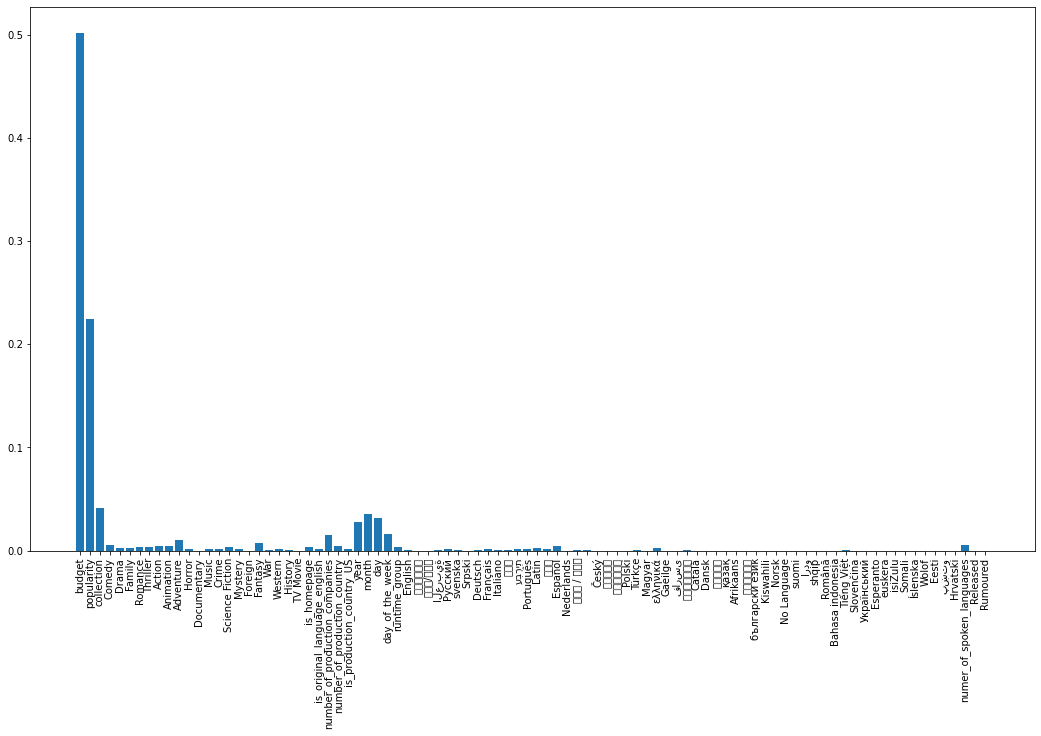

In [182]:
plt.figure(figsize = (18,10))
plt.bar(range(len(regressor.feature_importances_)), regressor.feature_importances_ , tick_label = train.drop('revenue', axis = 1).columns)
plt.xticks(rotation = 90)

## Tuning the model using GridSearchCV

Here, we will define a set of **combinations of hyperparameters** to be used in the **Random Forest Regressor**. We will use the **RandomizeSearchCV** and **GridSearchCV** of the **sklearn** library to **train** the **regression** model on the **combinations** of the **hyperparameters**.

We will first use **RandomizeSeachCV** which will **narrow down** the possible set of combinations of **hyperparameters**. Then we will use the **GridSeachCV** to find the **best parameters** for our model.

### RandomizeSearchCV

In [158]:
# Number of Trees in the Random Forest Regressor
n_estimators = [int(x) for x in np.linspace(10,300,30)]
# Number of features to consider while splitting
max_features = ['auto' , 'sqrt' , 'log2']
# Maximum Depth of the tree
max_depth = [int(x) for x in np.linspace(20,200,20)]
# The minimum number of samples required to split an internal node.
min_samples_split = [int(x) for x in np.linspace(10,500,50)]
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [int(x) for x in np.linspace(50,100,10)]
# True then bootstrap samples are used(smaller sample taken from the entire dataset) , False then the entire dataset is used.
bootstrap = ['True' , 'False']

param_random = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth'    : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap'    : bootstrap
}

We will have to create another **regressor object** of the **RandomForestRegressor**.

For scoring the different combinations of parameters in **RandomizedSeachCV** , we will use the **mean_squared_log_error**. We will then take the **square root** of the **best score** to evaluate the performance.

In [159]:
regressor_random = RandomForestRegressor()

regressor_random_grid = RandomizedSearchCV(estimator = regressor_random , 
                                           param_distributions = param_random , 
                                           n_iter = 30 ,
                                           cv = 10, 
                                           scoring = 'neg_mean_squared_log_error',
                                           verbose = 2 ,
                                           n_jobs = -1
                                          )

In [160]:
regressor_random_grid.fit(X_train, Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [20, 29, 38, 48, 57, 67,
                                                      76, 86, 95, 105, 114, 124,
                                                      133, 143, 152, 162, 171,
                                                      181, 190, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [50, 55, 61, 66, 72,
                                                             77, 83, 88, 94,
                                                             100],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50, 60, 70, 80

-----**Best Parameters**-----

In [161]:
print('Best Paramters : ' + str(regressor_random_grid.best_params_))

Best Paramters : {'n_estimators': 250, 'min_samples_split': 170, 'min_samples_leaf': 66, 'max_features': 'auto', 'max_depth': 162, 'bootstrap': 'True'}


-----**Best Score**-----

In [162]:
print('Best Score : ' + str(np.sqrt(-regressor_random_grid.best_score_)))

Best Score : 2.684368277481956


-----**Best Estimator**-----

In [163]:
print('Best Estimator : ' + str(regressor_random_grid.best_estimator_))

Best Estimator : RandomForestRegressor(bootstrap='True', max_depth=162, min_samples_leaf=66,
                      min_samples_split=170, n_estimators=250)


## Using the Best Estimator on the test set and Evaluating its performance

In [164]:
Y_pred_random = regressor_random_grid.best_estimator_.predict(X_test)
msle = mean_squared_log_error(Y_test , Y_pred_random)
rmse = np.sqrt(msle)

print("The Root-Mean-Squared-Logarithmic-Error using the best estimator found using Randomized Search CV is : " + str(rmse))

The Root-Mean-Squared-Logarithmic-Error using the best estimator found using Randomized Search CV is : 2.857582755997428


### GridSearchCV

Here we will use parameters which are close to the **default parameters** as it gave us **better result** on the **test set** than the **best estimator** found using the **RandomizedSearchCV**.

In [171]:
# Number of Trees in the Random Forest Regressor
n_estimators = [int(x) for x in np.linspace(100,200,5)]
# Number of features to consider while splitting
max_features = ['auto']
# Maximum Depth of the tree. We will keep the default value
# The minimum number of samples required to split an internal node.
min_samples_split = [int(x) for x in np.linspace(2,20,5)]
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,10,5)]
# True then bootstrap samples are used(smaller sample taken from the entire dataset) , False then the entire dataset is used.
bootstrap = ['True']

param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap'    : bootstrap
}

In [172]:
regressor_grid = RandomForestRegressor()

regressor_grid_search = GridSearchCV(estimator = regressor_grid , 
                                     param_grid = param_grid , 
                                     cv = 3 , 
                                     scoring = 'neg_mean_squared_log_error',
                                     verbose = 2 ,
                                     n_jobs = -1
                                    )

In [173]:
regressor_grid_search.fit(X_train , Y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': ['True'], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 6, 11, 15, 20],
                         'n_estimators': [100, 125, 150, 175, 200]},
             scoring='neg_mean_squared_log_error', verbose=2)

-----**Best Parameters**-----

In [174]:
print('Best Paramters : ' + str(regressor_grid_search.best_params_))

Best Paramters : {'bootstrap': 'True', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}


-----**Best Score**-----

In [178]:
print('Best Score : ' + str(np.sqrt(-regressor_grid_search.best_score_)))

Best Score : 2.520803899490714


-----**Best Estimator**-----

In [176]:
print('Best Estimator : ' + str(regressor_grid_search.best_estimator_))

Best Estimator : RandomForestRegressor(bootstrap='True', min_samples_leaf=3, min_samples_split=6)


## Using the Best Estimator on the test set and Evaluating its performance

In [179]:
Y_pred_grid = regressor_grid_search.best_estimator_.predict(X_test)
msle = mean_squared_log_error(Y_test , Y_pred_grid)
rmse = np.sqrt(msle)

print("The Root-Mean-Squared-Logarithmic-Error using the best estimator found using Grid Search CV is : " + str(rmse))


The Root-Mean-Squared-Logarithmic-Error using the best estimator found using Grid Search CV is : 2.757090275710473


## --RESULTS--

**RMSLE Values of the Test Set**

1) *USING THE DEFAULT PARAMETERS* = **2.755745690257132**

2) *USING THE BEST ESTIMATOR FOUND BY TRANDOMIZED SEARCH CV* = **2.857582755997428**

3) *USING THE BEST ESTIMATOR FOUND BY GRID SEARCH CV* = **2.757090275710473**

We can see that the **parameters** obtained using **Randomized Search CV** and **Grid Search CV** gave higher value of **RMSLE** than the default parameters.

Hence the best regressor model for this project is the **regressor** of **RandomForestRegressor** which uses the **default Parameters**.


## Conclusion

This concludes this project. We used the **TMDB Box Office Prediction** dataset obtained from **Kaggle.com**. We did a lot of **Exploratory Data Analysis** to extract important information from the **dataset**.

To deal with the **NULL VALUES** of the **budget** column, we also did **Web Scraping** using the **BeautifulSoup** library.

Finally, we used the **RandomForestRegressor** to train on our training set. We used **RandomSearchCV** and **GridSearchCV** to obtain different sets of **hyperparameters** but finally settled on the **default** **hyperparameters** as they gave the best **Root-Mean-Squared-Logarithmic-Error(RMSLE)** value.

Using the **default** parameters, we obtained a **RMSLE** value of **2.755745690257132**.

